# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [109]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity

There are three lines that compose Bollinger Bands: A simple moving average (middle band) and an upper and lower band. 
These bands move with the price, widening or narrowing as volatility increases or decreases, respectively. 
The position of the bands and how the price acts in relation to the bands provides information 
about how strong the trend is and potential bottom or topping signals.

Bollinger Bands have two adjustable settings: the Period and the Standard Deviation. 
The Period is how many price bars are included in the Bollinger Band calculation. 

Middle Band = 20-day simple moving average (SMA)
Upper Band = 20-day SMA + (20-day standard deviation of price x 2)
Lower Band = 20-day SMA – (20-day standard deviation of price x 2)
Where SMA(Simple Moving Average) = the sum of closing prices over n periods.

Usually the days over which STD is calculate is 20 but can be changed according to the situation.

In [34]:
data = pd.read_csv("TCS.csv")
data['20 Day SMA'] = data['Close Price'].rolling(window = 20).mean()
data['20 Day STD'] = data['Close Price'].rolling(window = 20).std()
data['Upper Band'] = data['20 Day SMA'] + (data['20 Day STD'] * 2)
data['Lower Band'] = data['20 Day SMA'] - (data['20 Day STD'] * 2)
data = data.dropna()
data['Mid Band'] = (data['Upper Band']+data['Lower Band'])/2
data.head()


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,20 Day SMA,20 Day STD,Upper Band,Lower Band,Mid Band
19,TCS,EQ,09-Jun-2017,2521.60,2520.0,2547.4,2486.0,2518.6,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2542.0425,71.824613,2685.691727,2398.393273,2542.0425
20,TCS,EQ,12-Jun-2017,2507.00,2497.0,2512.9,2470.4,2484.9,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2548.1475,60.249637,2668.646775,2427.648225,2548.1475
21,TCS,EQ,13-Jun-2017,2487.20,2465.0,2481.1,2447.0,2450.0,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2549.2675,58.090647,2665.448793,2433.086207,2549.2675
22,TCS,EQ,14-Jun-2017,2451.55,2455.0,2476.0,2455.0,2465.4,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2550.0100,56.909942,2663.829884,2436.190116,2550.0100
23,TCS,EQ,15-Jun-2017,2470.20,2469.0,2469.7,2405.0,2410.0,2411.20,2427.94,1498599,3.638509e+09,65157,1140716,76.12,2543.7600,64.820537,2673.401074,2414.118926,2543.7600


### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [192]:
def select_buy(data):
    if data['Close Price'] < data['Lower Band']:
        return "Buy"
    if data['Close Price'] > data['Lower Band'] and data['Close Price'] < data['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if data['Close Price'] > data['Mid Band'] and data['Close Price'] < data['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if data['Close Price'] > data['Upper Band']:
        return "Short"
data = data.assign(Call = data.apply(select_buy, axis=1))
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,20 Day SMA,20 Day STD,Upper Band,Lower Band,Mid Band,Call
19,TCS,EQ,09-Jun-2017,2521.60,2520.0,2547.4,2486.0,2518.6,2507.00,2513.28,...,3.955950e+09,83931,599286,38.07,2542.0425,71.824613,2685.691727,2398.393273,2542.0425,Hold Buy/ Liquidate Short
20,TCS,EQ,12-Jun-2017,2507.00,2497.0,2512.9,2470.4,2484.9,2487.20,2487.48,...,2.022948e+09,44849,306655,37.71,2548.1475,60.249637,2668.646775,2427.648225,2548.1475,Hold Buy/ Liquidate Short
21,TCS,EQ,13-Jun-2017,2487.20,2465.0,2481.1,2447.0,2450.0,2451.55,2464.89,...,1.448635e+09,52410,268108,45.62,2549.2675,58.090647,2665.448793,2433.086207,2549.2675,Hold Buy/ Liquidate Short
22,TCS,EQ,14-Jun-2017,2451.55,2455.0,2476.0,2455.0,2465.4,2470.20,2469.41,...,1.838651e+09,42987,456486,61.31,2550.0100,56.909942,2663.829884,2436.190116,2550.0100,Hold Buy/ Liquidate Short
23,TCS,EQ,15-Jun-2017,2470.20,2469.0,2469.7,2405.0,2410.0,2411.20,2427.94,...,3.638509e+09,65157,1140716,76.12,2543.7600,64.820537,2673.401074,2414.118926,2543.7600,Buy


In [102]:
le = preprocessing.LabelEncoder()
X = data[['Upper Band','Lower Band','Mid Band','Close Price']]
transformed_label = le.fit_transform(data[['Call']])
Y = transformed_label.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , shuffle = True)


/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [195]:
LR = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='ovr').fit(X_train,Y_train.ravel())
y_pred = LR.predict(X_train)
print('Logistic Regression')
round(LR.score(X_test,Y_test), 4)


Logistic Regression


0.8542

In [105]:
SVM = svm.LinearSVC()
SVM.fit(X_train,Y_train)
SVM.predict(X_train)
print("Support Vector Machines")
round(SVM.score(X_test,Y_test), 4)

Support Vector Machines


/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6667

In [106]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(X_train, Y_train)  
RF.predict(X_train) 
print("Random Forest")
round(RF.score(X_test,Y_test), 4)

Random Forest


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6042

In [107]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(X_train,Y_train)  
NN.predict(X_train)
print("Neural Networks")
round(NN.score(X_test,Y_test), 4)


Neural Networks


/opt/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4896

In [108]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_train)
print("K-Nearest-Neighbour : ")
round(NN.score(X_test,Y_test), 4)


K-Nearest-Neighbour : 


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.4896

In [205]:
VOLTAS=pd.read_csv('VOLTAS.csv')

VOLTAS['Upper Bollinger Band']=VOLTAS['Close Price'].rolling(14).mean()+2*VOLTAS['Close Price'].rolling(14).std()
VOLTAS['Lower Bollinger Band']=VOLTAS['Close Price'].rolling(14).mean()-2*VOLTAS['Close Price'].rolling(14).std()
VOLTAS['Middle Bollinger Band']=(VOLTAS['Upper Bollinger Band']+VOLTAS['Lower Bollinger Band'])/2
VOLTAS['Call']="xyz"

for i in range(0,len(VOLTAS)):
    if(VOLTAS['Close Price'][i]<VOLTAS['Lower Bollinger Band'][i]):       
        VOLTAS['Call'][i]="Buy"
    elif((VOLTAS['Close Price'][i]>VOLTAS['Lower Bollinger Band'][i]) and (VOLTAS['Close Price'][i]<VOLTAS['Middle Bollinger Band'][i])):
        
        VOLTAS['Call'][i]="Hold Buy/ Liquidate Short"
    elif((VOLTAS['Close Price'][i]>VOLTAS['Middle Bollinger Band'][i])and (VOLTAS['Close Price'][i]<VOLTAS['Upper Bollinger Band'][i])):
        VOLTAS['Call'][i]="Hold Short/ Liquidate Buy"
    else:
        VOLTAS['Call'][i]="Short"
     

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda/lib/python3.6/site-pack

In [224]:
Counter(VOLTAS['Call']).values()

dict_values([37, 233, 207, 17])

QUERY 4.2

In [229]:
dt = pd.read_csv("ITC.csv")
dt.head()


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57


In [230]:
dt['%chg open/close'] = ((dt['Close Price'] - dt['Open Price'])/(dt['Close Price']))*100
dt['%chg close/high'] = ((dt['Close Price'] - dt['High Price'])/(dt['Low Price']))*100
dt['%cl_DTD 5dymean'] = dt['Close Price'].pct_change().dropna().rolling(5).mean()
dt['%cl_DTD 5dystd'] = dt['Close Price'].pct_change().dropna().rolling(5).std()
dt=dt.dropna()
dt.head()


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg open/close,%chg close/high,%cl_DTD 5dymean,%cl_DTD 5dystd
5,ITC,EQ,22-May-2017,286.20,292.45,304.80,291.30,303.0,303.60,299.75,35939315,1.077281e+10,250048,17079600,47.52,3.672596,-0.411946,0.018157,0.029787
6,ITC,EQ,23-May-2017,303.60,301.90,303.90,298.25,300.0,300.15,300.39,19784738,5.943114e+09,127039,12142585,61.37,-0.583042,-1.257334,0.011927,0.032495
7,ITC,EQ,24-May-2017,300.15,300.00,301.95,297.90,300.1,299.90,299.95,9457848,2.836837e+09,87850,6078221,64.27,-0.033344,-0.688150,0.013031,0.031806
8,ITC,EQ,25-May-2017,299.90,300.00,304.70,295.35,301.0,300.05,300.00,22769975,6.830908e+09,110127,16464978,72.31,0.016664,-1.574403,0.015793,0.029458
9,ITC,EQ,26-May-2017,300.05,302.00,313.80,299.55,306.1,309.10,305.48,21742467,6.641980e+09,155758,8123024,37.36,2.296991,-1.569020,0.015852,0.029494


In [241]:

dt['Action']=1
dt.index = [ i for i in range(0,len(dt))]
l=len(dt)-1
for i in range(0,l):
    if (dt['Close Price'][i+1]>dt['Close Price'][i]):
        dt['Action'][i]=1
    elif(dt['Close Price'][i+1]<dt['Close Price'][i]):
        dt['Action'][i]=-1

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [242]:
classifier=RandomForestClassifier()
X=dt[['%chg open/close','%chg close/high','%cl_DTD 5dymean','%cl_DTD 5dystd']]
Y=dt[['Action']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


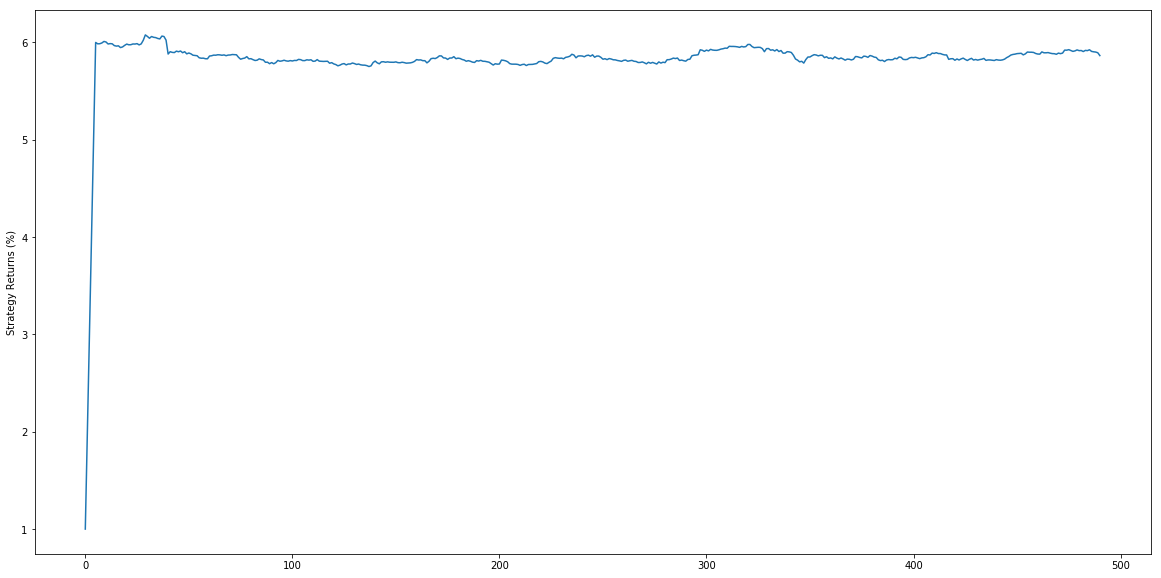

In [243]:
dt['netcumret']=1.0
for i in range(6,len(dt)):
    dt['netcumret'][i]=float(dt['Close Price'][i]-dt['Close Price'][i-1])/dt['Close Price'][i]
plt.figure(figsize=(20,10))
plt.plot(dt['netcumret'].cumsum())
plt.ylabel('Strategy Returns (%)')
plt.show()